In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
Iris = load_iris()

In [3]:
Iris.data.shape

(150, 4)

In [4]:
Iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
print(Iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [6]:
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
#1.K-Fold 
Irkf = KFold(n_splits=10,random_state=2)
LDA_clf = LinearDiscriminantAnalysis(n_components=2)
scores = []

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [8]:
for index,(train_index,test_index) in enumerate(Irkf.split(Iris.data)):
    LDA_clf.fit(Iris.data[train_index],Iris.target[train_index])
    pred = LDA_clf.predict(Iris.data[test_index])
    acc = metrics.accuracy_score(Iris.target[test_index],pred)
    print("FOLD:",index+1,"Accuracy",acc)
    scores.append(acc)
print("Average Accuracy:",np.mean(scores))

FOLD: 1 Accuracy 1.0
FOLD: 2 Accuracy 1.0
FOLD: 3 Accuracy 1.0
FOLD: 4 Accuracy 1.0
FOLD: 5 Accuracy 0.9333333333333333
FOLD: 6 Accuracy 0.9333333333333333
FOLD: 7 Accuracy 1.0
FOLD: 8 Accuracy 1.0
FOLD: 9 Accuracy 0.8
FOLD: 10 Accuracy 1.0
Average Accuracy: 0.9666666666666668


In [9]:
#2.Stratified K-FOLD
from sklearn.model_selection import StratifiedKFold
Skf_ir = StratifiedKFold(n_splits=3,random_state=2)
scores = []

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [12]:
for index,(train_index,test_index) in enumerate(Skf_ir.split(Iris.data,Iris.target)):
    LDA_clf.fit(Iris.data[train_index],Iris.target[train_index])
    pred = LDA_clf.predict(Iris.data[test_index])
    acc = metrics.accuracy_score(Iris.target[test_index],pred)
    print("The proportion of each test group:\n",pd.value_counts(Iris.target[test_index]))
    print("\n")
    scores.append(acc)
print("Average Accuracy:",np.mean(scores))

The proportion of each test group:
 1    17
0    17
2    16
dtype: int64


The proportion of each test group:
 2    17
0    17
1    16
dtype: int64


The proportion of each test group:
 2    17
1    17
0    16
dtype: int64


Average Accuracy: 0.98


In [13]:
train_x,test_x,train_y,test_y = train_test_split(Iris.data,Iris.target,test_size=0.25,random_state =2)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [19]:
pipe_KNN = Pipeline([("scale",StandardScaler()),("KNN",KNeighborsClassifier())])
##Define the num of pionts to be searched
n_neighbors = np.arange(1,10)
para_grid = [{"scale__with_mean":[True,False],"KNN__n_neighbors":n_neighbors}]

In [20]:
##Apply to data
gs_KNN_ir = GridSearchCV(estimator=pipe_KNN,param_grid=para_grid,cv=10,n_jobs=4)
gs_KNN_ir.fit(train_x,train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('KNN',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
           

In [21]:
gs_KNN_ir.best_params_

{'KNN__n_neighbors': 9, 'scale__with_mean': True}

In [24]:
gs_KNN_ir.best_score_

0.9553030303030303

In [25]:
gs_KNN_ir.best_estimator_

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=9, p=2,
                                      weights='uniform'))],
         verbose=False)

In [26]:
gs_KNN_ir.classes_

array([0, 1, 2])

In [27]:
gs_KNN_ir.cv_results_

{'mean_fit_time': array([0.00180469, 0.00150425, 0.00120337, 0.00130343, 0.00110116,
        0.00100279, 0.00120218, 0.00110326, 0.00100212, 0.00130324,
        0.00110285, 0.00100241, 0.00110288, 0.00100279, 0.00120239,
        0.00110254, 0.00130212, 0.0010031 ]),
 'std_fit_time': array([2.44780837e-03, 5.01323037e-04, 4.01044317e-04, 4.59869169e-04,
        2.97913382e-04, 4.48407469e-04, 4.01883990e-04, 3.00773674e-04,
        2.03090090e-06, 4.59369112e-04, 3.00669689e-04, 4.48410324e-04,
        3.00900490e-04, 4.48460784e-04, 4.00882515e-04, 3.00535375e-04,
        4.60114370e-04, 1.48146023e-06]),
 'mean_score_time': array([0.00150473, 0.00170438, 0.00190568, 0.00130332, 0.00180554,
        0.00150394, 0.0013046 , 0.00140336, 0.00110312, 0.00130382,
        0.00140469, 0.00110302, 0.00140374, 0.0016041 , 0.00120354,
        0.00150452, 0.00140383, 0.00140316]),
 'std_score_time': array([0.00050132, 0.00045941, 0.00030097, 0.00045953, 0.00040181,
        0.0005012 , 0.0004588 , 

In [28]:
Iris_clf = gs_KNN_ir.best_estimator_
pred = Iris_clf.predict(test_x)

In [30]:
print("Acc:",metrics.accuracy_score(test_y,pred))

Acc: 1.0


In [31]:
pd.value_counts(test_y)

0    16
2    11
1    11
dtype: int64

In [32]:
metrics.confusion_matrix(test_y,pred)

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 11]], dtype=int64)

In [33]:
confm = metrics.confusion_matrix(test_y,pred)

Text(91.68, 0.5, 'Predicted label')

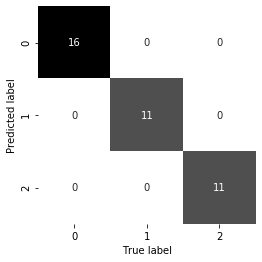

In [34]:
sns.heatmap(confm.T,square=True,annot=True,fmt='d',cbar=False,cmap=plt.cm.gray_r)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [35]:
print(metrics.classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

